🤖 Task 2: Baseline ML Model Training
Dataset loaded: (541, 6)
🎯 Target column: PCOS (Y/N)
📋 Selected 3 features for training
🔧 Handling missing values...
✅ Final dataset shape: X=(541, 3), y=(541,)
📊 Class distribution: {0: 364, 1: 177}
📊 Training set: 432 samples
📊 Test set: 109 samples
✅ Features scaled with StandardScaler

🚀 Training Baseline Models...

📈 Training Logistic Regression...
   ✅ Accuracy: 0.670 (67.0%)

📊 Classification Report for Logistic Regression:
              precision    recall  f1-score   support

     No PCOS       0.67      1.00      0.80        73
        PCOS       0.00      0.00      0.00        36

    accuracy                           0.67       109
   macro avg       0.33      0.50      0.40       109
weighted avg       0.45      0.67      0.54       109


📈 Training Random Forest...


c:\Users\Divik\luna-care-frontend\ml\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Divik\luna-care-frontend\ml\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Divik\luna-care-frontend\ml\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

   ✅ Accuracy: 0.596 (59.6%)

📊 Classification Report for Random Forest:
              precision    recall  f1-score   support

     No PCOS       0.68      0.75      0.71        73
        PCOS       0.36      0.28      0.31        36

    accuracy                           0.60       109
   macro avg       0.52      0.52      0.51       109
weighted avg       0.57      0.60      0.58       109


📊 BASELINE MODEL COMPARISON
                 Model  Accuracy
0  Logistic Regression  0.669725
1        Random Forest  0.596330


FileNotFoundError: [Errno 2] No such file or directory: '../results/baseline_model_comparison.png'

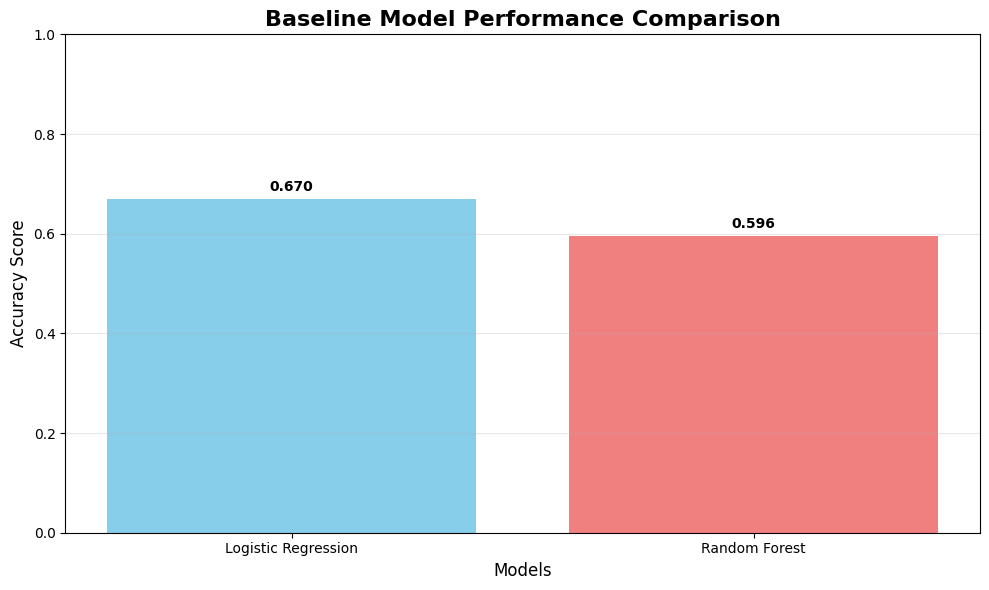

In [2]:
# Cell 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

print("🤖 Task 2: Baseline ML Model Training")
print("="*50)

# Load preprocessed data
df = pd.read_csv('../data/processed/PCOS_infertility.csv')
print(f"Dataset loaded: {df.shape}")

# Cell 2: Data Preprocessing for ML
# Find target column
target_columns = [col for col in df.columns if 'PCOS' in col.upper()]
target_col = target_columns[0]
print(f"🎯 Target column: {target_col}")

# Select features (exclude non-predictive columns)
feature_cols = []
exclude_cols = ['Sl. No', 'Patient File No.', target_col]

for col in df.columns:
    if col not in exclude_cols:
        # Skip columns with too many missing values
        missing_pct = df[col].isnull().sum() / len(df)
        if missing_pct < 0.5:  # Keep if less than 50% missing
            feature_cols.append(col)

print(f"📋 Selected {len(feature_cols)} features for training")

# Prepare X and y
X = df[feature_cols].copy()
y = df[target_col].copy()

# Handle missing values
print("🔧 Handling missing values...")
numeric_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Fill numeric with median
for col in numeric_cols:
    X[col] = X[col].fillna(X[col].median())

# Fill categorical with mode
for col in categorical_cols:
    mode_val = X[col].mode()
    if len(mode_val) > 0:
        X[col] = X[col].fillna(mode_val[0])
    else:
        X[col] = X[col].fillna('Unknown')

# Encode categorical variables
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    le_dict[col] = le

# Ensure target is binary
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

print(f"✅ Final dataset shape: X={X.shape}, y={y.shape}")
print(f"📊 Class distribution: {dict(zip(*np.unique(y, return_counts=True)))}")

# Cell 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"📊 Training set: {len(X_train)} samples")
print(f"📊 Test set: {len(X_test)} samples")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled with StandardScaler")

# Cell 4: Define and Train Baseline Models
print("\n🚀 Training Baseline Models...")
print("="*40)

# Define models to train
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
}

# Train and evaluate each model
results = {}
trained_models = {}

for name, model in models.items():
    print(f"\n📈 Training {name}...")
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'accuracy': accuracy,
        'predictions': y_pred,
        'probabilities': y_proba
    }
    trained_models[name] = model
    
    print(f"   ✅ Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
    
    # Classification report
    print(f"\n📊 Classification Report for {name}:")
    print(classification_report(y_test, y_pred, target_names=['No PCOS', 'PCOS']))

# Cell 5: Model Comparison and Visualization
print("\n📊 BASELINE MODEL COMPARISON")
print("="*40)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results.keys()]
}).sort_values('Accuracy', ascending=False)

print(comparison_df)

# Visualize model comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy'], 
               color=['skyblue', 'lightcoral'])

# Add value labels on bars
for bar, accuracy in zip(bars, comparison_df['Accuracy']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{accuracy:.3f}', ha='center', va='bottom', fontweight='bold')

plt.title('Baseline Model Performance Comparison', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy Score', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)

# Save plot
plt.tight_layout()
plt.savefig('../results/baseline_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Cell 6: Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for idx, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['predictions'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['No PCOS', 'PCOS'],
                yticklabels=['No PCOS', 'PCOS'])
    
    axes[idx].set_title(f'Confusion Matrix - {name}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Predicted', fontsize=12)
    axes[idx].set_ylabel('Actual', fontsize=12)

plt.tight_layout()
plt.savefig('../results/baseline_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

# Cell 7: Save Best Model and Artifacts
# Find best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = trained_models[best_model_name]
best_accuracy = comparison_df.iloc[0]['Accuracy']

print(f"\n🏆 BEST BASELINE MODEL: {best_model_name}")
print(f"   📈 Accuracy: {best_accuracy:.3f} ({best_accuracy*100:.1f}%)")

# Save best model and preprocessing artifacts
import os
os.makedirs('../models/baseline', exist_ok=True)

joblib.dump(best_model, '../models/baseline/best_baseline_model.joblib')
joblib.dump(scaler, '../models/baseline/baseline_scaler.joblib')
joblib.dump(feature_cols, '../models/baseline/baseline_features.joblib')
joblib.dump(le_dict, '../models/baseline/baseline_encoders.joblib')

# Save model info
model_info = {
    'best_model': best_model_name,
    'accuracy': best_accuracy,
    'features': feature_cols,
    'feature_count': len(feature_cols),
    'training_samples': len(X_train),
    'test_samples': len(X_test),
    'all_results': {name: results[name]['accuracy'] for name in results.keys()}
}

joblib.dump(model_info, '../models/baseline/baseline_model_info.joblib')

print("\n💾 Baseline model artifacts saved:")
print("   ✅ best_baseline_model.joblib")
print("   ✅ baseline_scaler.joblib") 
print("   ✅ baseline_features.joblib")
print("   ✅ baseline_encoders.joblib")
print("   ✅ baseline_model_info.joblib")

# Cell 8: Test Model Loading and Prediction
print("\n🧪 Testing Saved Model...")

# Load saved model
loaded_model = joblib.load('../models/baseline/best_baseline_model.joblib')
loaded_scaler = joblib.load('../models/baseline/baseline_scaler.joblib')

# Test prediction on a sample
sample_idx = 0
sample_data = X_test.iloc[sample_idx:sample_idx+1]
sample_scaled = loaded_scaler.transform(sample_data)
prediction = loaded_model.predict(sample_scaled)[0]
actual = y_test.iloc[sample_idx]

print(f"   Sample prediction: {prediction} (Actual: {actual})")
print(f"   ✅ Model loading and prediction successful!")

print("\n🎉 TASK 2 COMPLETED SUCCESSFULLY!")
print("="*50)
print(f"✅ Trained {len(models)} baseline models")  
print(f"✅ Best model: {best_model_name} ({best_accuracy:.1%} accuracy)")
print(f"✅ Model artifacts saved for next tasks")
print(f"✅ Ready for Task 3: Model Optimization")
